#https://dacon.io/cpt9/145514

  # Step 1: Define the Problem
#시계열 예측 : 주어진 펀다 2019-02-28일까지의 상점별 카드 매출 내역 데이터를 이용해 
#2019-03-01부터 2019-05-31까지의 지점별 총 매출을 예측

#Step 2: Gather the Data 데이터 수집 및 특성 파악

  funda_train.csv - 2019-02-28일까지의 상점별 카드 매출 내역

  submission.csv – 제출 파일의 형식

  [Data fields]

  funda_train.csv

  1. store_id : 상점의 고유 아이디

  2. card_id : 사용한 카드의 고유 아이디

  3. card_company : 비식별화된 카드 회사

  4. trasacted_date : 거래 날짜

  5. transacted_time : 거래 시간( 시:분 )

  6. installment_term : 할부 개월 수( 포인트 사용 시 (60개월 + 실제할부개월)을 할부개월수에 기재한다. )

  7. region : 상점의 지역

  8. type_of_business : 상점의 업종

  9. amount : 거래액(단위는 원이 아닙니다)

  submission.csv

  1. store_id : 상점의 고유 아이디

  2. amount : 사용자들은 상점별로 2019-03-01부터 2019-05-31까지의 총 매출을 예측하여 기입

In [2]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#한글 깨짐 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False


if platform.system() =='Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).\
    get_name()
    rc('font', family = font_name)
else : 
    print('Unknown system...sorry~~~~')

In [97]:
data = pd.read_csv('../Funda/funda_train.csv', parse_dates=['transacted_date'], index_col='transacted_date')

In [99]:
data.shape

(6556613, 8)

In [100]:
data.sample(20)

,store_id,card_id,card_company,transacted_time,installment_term,region,type_of_business,amount
transacted_date,,,,,,,,
2018-12-22,1623,3524481,c,20:28,0,부산 연제구,"신선, 냉동 및 기타 수산물 소매업",7142.857143
2018-01-03,36,96411,c,17:05,0,서울 마포구,NaN,10000.000000
2019-01-21,1323,2860928,e,16:51,0,대구 수성구,NaN,728.571429
2016-10-07,988,2114483,a,11:41,0,대구 북구,기타 식료품 소매업,2142.857143
2018-07-23,1584,3434864,b,12:48,0,경남 김해시,그 외 기타 종합 소매업,10285.714286
2018-10-11,1164,2502576,c,14:24,0,전남 여수시,여관업,7142.857143
2019-02-22,1121,2413348,c,19:12,3,광주 서구,의복 소매업,39800.000000
2018-12-18,713,1456906,c,20:09,0,NaN,NaN,39285.714286
2018-02-15,1715,2193773,a,15:17,0,경남 김해시,NaN,1428.571429


In [101]:
#자료형 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6556613 entries, 2016-06-01 to 2019-02-28
Data columns (total 8 columns):
store_id            int64
card_id             int64
card_company        object
transacted_time     object
installment_term    int64
region              object
type_of_business    object
amount              float64
dtypes: float64(1), int64(3), object(4)
memory usage: 450.2+ MB


In [102]:
data.describe()

,store_id,card_id,installment_term,amount
count,6.556613e+06,6.556613e+06,6.556613e+06,6.556613e+06
mean,1.084930e+03,2.268127e+06,1.382017e-01,1.043511e+04
std,6.152183e+02,1.351058e+06,1.188152e+00,3.104031e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.771429e+06
25%,5.860000e+02,1.088828e+06,0.000000e+00,2.142857e+03
50%,1.074000e+03,2.239304e+06,0.000000e+00,4.285714e+03
75%,1.615000e+03,3.438488e+06,0.000000e+00,8.571429e+03
max,2.136000e+03,4.663856e+06,9.300000e+01,5.571429e+06


In [6]:
#결측치 확인 => 지역데이터의 약 30%가 결측치/ 업종데이터는 50% 이상이 결측치
data.isnull().sum()

store_id                  0
card_id                   0
card_company              0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

In [75]:
#결측치 없는 데이터 유니크값
print(data['store_id'].unique())
print(data['card_company'].unique())
print(data['installment_term'].unique())

[   0    1    2 ... 2134 2135 2136]
['b' 'h' 'c' 'a' 'f' 'e' 'g' 'd']
[ 0  2  3 60  4  5  6 10 12 15  7  8  9 18 24 16 14 11 20 36 13 35 80 17
 19 23 30 22 83 63 93 65 82 72]


In [19]:
#결측치 있는 컬럼 빈도 보기
print(data['region'].value_counts())
print(data['type_of_business'].value_counts())

경기 수원시     122029
충북 청주시     116766
경남 창원시     107147
경남 김해시     100673
경기 평택시      82138
서울 마포구      78652
제주 제주시      68130
경북 포항시      67490
서울 강남구      65312
경북 구미시      65235
대전 서구       63564
충남 천안시      62038
전북 전주시      61720
서울 송파구      61290
대구 수성구      57165
경기 성남시      56301
경기 부천시      55918
경남 양산시      53871
경북 경주시      52843
경기 화성시      51850
경기 파주시      50794
경기 용인시      50530
서울 서초구      50512
경기 광주시      49975
울산 남구       47674
인천 남동구      47417
경기 의정부시     47333
제주 서귀포시     46541
강원 원주시      46282
충북 충주시      45641
            ...  
충북 단양군       4556
충남 부여군       4442
경기 양평군       4340
경남 창녕군       4183
충남 홍성군       3816
강원 홍천군       3664
전북 순창군       3519
전남 담양군       3448
충북 옥천군       3201
경기 과천시       3193
경북 울진군       3129
전남 함평군       3092
강원 양구군       2848
전북 남원시       2815
경기 의왕시       2801
충남 예산군       2654
전남 고흥군       2600
경북 상주시       2563
세종 도움3로      2372
충남 논산시       2277
경북 칠곡군       2236
인천 동구        2230
대구 서구        1984
세종 조치원읍      1685
경북 안동시    

In [34]:
#카드사별 총매출
card_company = data.groupby('card_company')['amount'].sum().sort_values(ascending = False)
card_company

card_company
a    1.781487e+10
c    1.129750e+10
b    1.068352e+10
e    7.595017e+09
f    6.290195e+09
d    6.140337e+09
g    4.859472e+09
h    3.738077e+09
Name: amount, dtype: float64

In [103]:
data['region'].fillna('0', inplace = True)
data['type_of_business'].fillna('0', inplace = True)

In [123]:
#시간 데이터 날짜형으로 변환
import datetime
data['transacted_time2']  = pd.to_datetime(data['transacted_time'])

In [121]:
data['transacted_hour'] =  data['transacted_time'].str.split(':', expand = True)[0]

In [125]:
data.drop('transacted_time', axis = 1, inplace = True)

In [104]:
#범주형 자료 전처리(카드회사 코드)
cat_mapping = {'a': 0,
              'b' : 1,
              'c' : 2,
              'd' : 3,
              'e' : 4,
              'f': 5,
              'g' : 6,
              'h' : 7}
data['card_company'] = data['card_company'].map(cat_mapping)

In [126]:
data.sample(20)

,store_id,card_id,card_company,installment_term,region,type_of_business,amount,transacted_hour,transacted_time2
transacted_date,,,,,,,,,
2017-04-29,1603,3473581,5,0,179,0,1285.714286,16,2019-12-15 16:52:00
2016-10-27,1729,3730092,2,0,98,0,7757.142857,20,2019-12-15 20:09:00
2018-04-12,111,269378,0,0,112,31,4571.428571,16,2019-12-15 16:07:00
2018-01-15,1729,3732499,4,0,98,0,6857.142857,20,2019-12-15 20:07:00
2017-03-17,371,684745,2,0,137,34,84285.714286,18,2019-12-15 18:27:00
2017-08-08,713,1456199,4,0,0,0,857.142857,18,2019-12-15 18:27:00
2018-02-26,1019,2192105,1,0,160,42,2571.428571,18,2019-12-15 18:09:00
2017-03-06,2076,4528381,3,0,0,0,1000.000000,18,2019-12-15 18:43:00
2017-06-16,769,1614868,5,0,0,0,14285.714286,12,2019-12-15 12:30:00


In [106]:
#범주형 자료 전처리(지역명)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [107]:
y = encoder.fit_transform(data['region'].values)
data['region'] = y

In [109]:
y_original = encoder.inverse_transform(y)
y_original

array(['0', '0', '0', ..., '제주 제주시', '제주 제주시', '제주 제주시'], dtype=object)

In [110]:
#범주형 자료 전처리(업종명)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y2 = encoder.fit_transform(data['type_of_business'].values)
data['type_of_business'] = y2

In [135]:
data.sample(20)

,store_id,card_id,card_company,installment_term,region,type_of_business,amount,transacted_hour,transacted_time2,missing_region,missing_business
transacted_date,,,,,,,,,,,
2018-12-14,865,1840118,1,0,0,0,7142.857143,22,2019-12-15 22:43:00,1,1
2016-07-28,1542,3345176,5,0,40,140,714.285714,13,2019-12-15 13:34:00,0,0
2018-08-29,1802,1446226,2,0,47,0,-9428.571429,12,2019-12-15 12:57:00,0,1
2018-01-06,1273,2748014,2,0,0,0,1857.142857,18,2019-12-15 18:33:00,1,1
2017-07-07,1470,3161685,4,0,37,140,5000.000000,21,2019-12-15 21:47:00,0,0
2019-01-30,328,627130,0,0,25,0,3928.571429,17,2019-12-15 17:37:00,0,1
2017-10-05,1298,2812895,0,0,77,0,2285.714286,21,2019-12-15 21:29:00,0,1
2017-01-19,538,813708,0,0,104,102,628571.428571,15,2019-12-15 15:15:00,0,0
2016-10-21,256,498774,3,0,22,140,3785.714286,22,2019-12-15 22:33:00,0,0


In [132]:
#결측치 여부 칼럼 추가 : missing이면 1, 아니면 0
data['missing_region'] = 0
data['missing_region'].loc[data['region'] == 0] = 1

C:\Users\NY\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [134]:
data['missing_business'] = 0
data['missing_business'].loc[data['type_of_business'] == 0] = 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215FEEE56A0>,
      dtype=object)

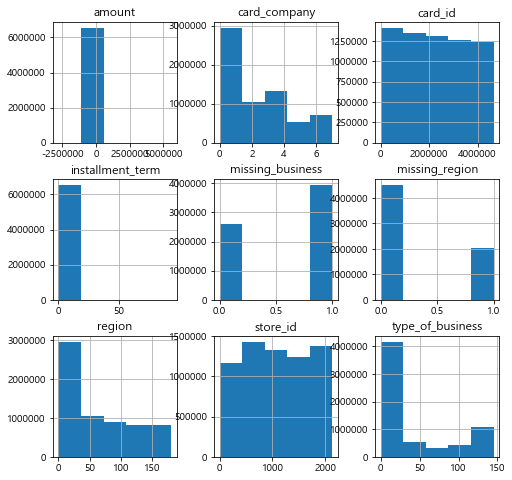

In [136]:
#히스토그램
data.hist(bins = 5, figsize = (8,8))

In [34]:
data.to_csv('../Funda/preprocessing3.csv')

NameError: name 'data' is not defined

In [5]:
#가게별 월매출 집계
df = pd.read_csv('../Funda/preprocessing3.csv', parse_dates=['transacted_date'])

In [4]:
df.sample(10)

,transacted_date,store_id,card_id,card_company,installment_term,region,type_of_business,amount,transacted_hour,transacted_time2,missing_region,missing_business
4849599,2016-12-16,1593,3452887,1,3,89,55,15714.285714,14,2019-12-15 14:08:00,0,0
4081095,2016-08-09,1340,2892623,0,0,54,0,7000.000000,19,2019-12-15 19:39:00,0,1
5597127,2018-07-19,1842,3973658,4,0,0,0,2785.714286,20,2019-12-15 20:46:00,1,1
5715926,2018-10-21,1881,4060148,4,0,71,0,1000.000000,12,2019-12-15 12:13:00,0,1
4048676,2018-01-21,1328,2869843,1,0,0,0,15428.571429,1,2019-12-15 01:02:00,1,1
2703176,2016-08-20,890,1887952,2,0,165,45,7857.142857,19,2019-12-15 19:37:00,0,0
148030,2017-12-05,41,107925,0,0,110,0,11571.428571,22,2019-12-15 22:09:00,0,1
2704102,2017-03-16,890,1888729,0,0,165,45,7142.857143,19,2019-12-15 19:42:00,0,0
2886445,2018-12-26,939,2008422,0,0,0,0,748571.428571,17,2019-12-15 17:31:00,1,1
5026023,2018-10-31,1660,3579942,2,0,127,55,5714.285714,20,2019-12-15 20:32:00,0,0


In [38]:
del df['transacted_time2']

In [39]:
df['YearMonth'] = df['transacted_date'].map(lambda x: str(x.year) + '-'+ str(x.month))

In [43]:
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format = '%Y-%m')

In [45]:
del df['transacted_date']

In [149]:
df_monthly = df.groupby(['store_id','YearMonth'])[['amount', 'region','type_of_business', 'missing_region', 'missing_business']].mean()

In [150]:
df_monthly_2 = df_monthly.reset_index()

In [152]:
df_monthly_2.sample(20)

,store_id,YearMonth,amount,region,type_of_business,missing_region,missing_business
36329,1268,2019-01-01,21928.571429,0,0,1,1
35489,1237,2017-12-01,20451.770452,179,0,0,1
46629,1637,2018-06-01,82267.582418,89,9,0,0
57165,2021,2017-12-01,969.035153,71,63,0,0
45614,1603,2017-07-01,2069.868637,179,0,0,1
13478,461,2017-02-01,6701.627486,91,0,0,1
46305,1625,2018-11-01,17464.285714,50,0,0,1
52307,1837,2017-11-01,2850.393701,0,140,1,0
3002,102,2019-01-01,4810.714286,0,0,1,1
8189,277,2018-10-01,3349.206349,0,0,1,1


In [6]:
df_monthly_2.to_csv('../Funda/preprocessing4.csv')

NameError: name 'df_monthly_2' is not defined

In [42]:
df2 = pd.read_csv('../Funda/preprocessing4.csv',index_col = ['YearMonth'])

In [43]:
del df2['Unnamed: 0']

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60232 entries, 2016-06-01 to 2019-02-01
Data columns (total 6 columns):
store_id            60232 non-null int64
amount              60232 non-null float64
region              60232 non-null int64
type_of_business    60232 non-null int64
missing_region      60232 non-null int64
missing_business    60232 non-null int64
dtypes: float64(1), int64(5)
memory usage: 3.2+ MB


In [45]:
#11번 가게로 테스트
df_11 = df2.loc[df2['store_id'] == 11]

In [53]:
X_train = df2.loc[df2.index < '2018-08-01']
y_train = X_train['amount']

In [54]:
X_test=df2.loc[df2.index >= '2018-08-01']
y_test = X_test['amount']

In [49]:
del X_test['amount']

In [55]:
X_train

,store_id,amount,region,type_of_business,missing_region,missing_business
YearMonth,,,,,,
2016-06-01,0,5151.724138,0,36,1,0
2016-07-01,0,5646.067416,0,36,1,0
2016-08-01,0,5096.908939,0,36,1,0
2016-09-01,0,5611.607143,0,36,1,0
2016-10-01,0,5002.566296,0,36,1,0
2016-11-01,0,5280.303030,0,36,1,0
2016-12-01,0,5254.187192,0,36,1,0
2017-01-01,0,4963.075061,0,36,1,0
2017-02-01,0,5401.360544,0,36,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.001).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.00
테스트 세트 점수: -0.01


In [197]:
#ADF Test
from statsmodels.tsa.stattools import adfuller

In [221]:
print("p-value:", adfuller(df_11['amount'])[1])
#The p-value is greater than the significance level 0.05 so it is not stationary and differencing is as such needed, ie. d > 0.

p-value: 0.20162616689809004


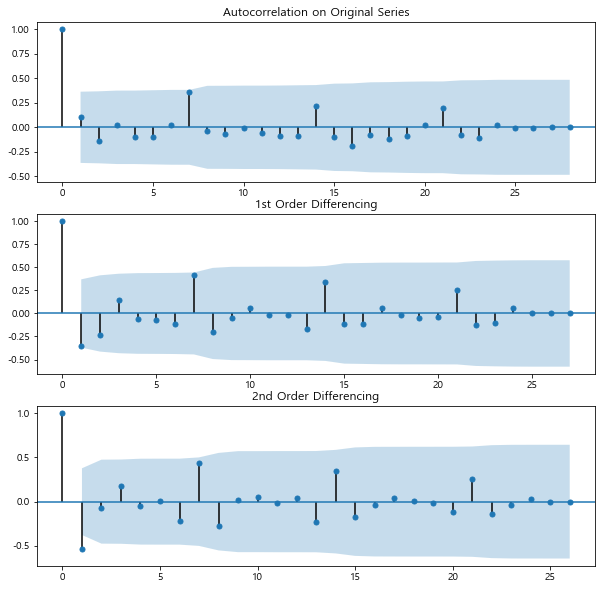

In [216]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#autocorelation : 특정 시간만큼 지연된(lag) 시점의 연관성을 그 사이 데이터의 영향을 배제하고 보여준다.
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(df_11['amount'], ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(df_11['amount'].diff().dropna(), ax=ax2, 
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(df_11['amount'].diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")

C:\Users\NY\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\NY\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


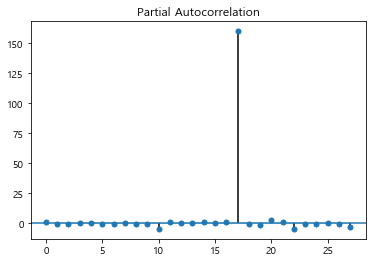

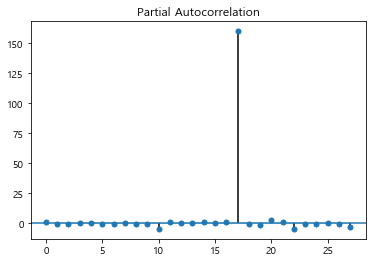

In [217]:
plot_pacf(df_11['amount'].diff().dropna(), lags=40)
#partial autocorelation : t 시점과 특정 시간만큼 지연된 시점 t-p의 연관성을 그 사이 (t..t-p) 데이터의 영향을 배제하고 보여준다.

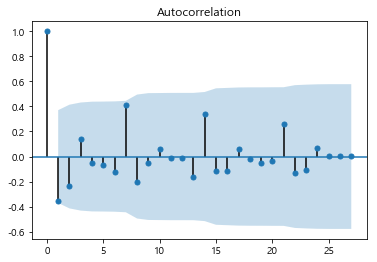

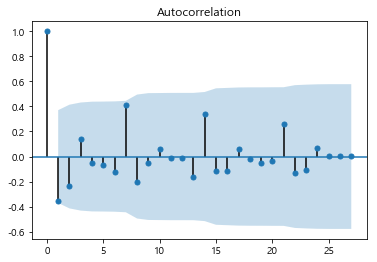

In [218]:
plot_acf(df_11['amount'].diff().dropna())

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop('amount', inplace = True), df2['amount'], random_state = 0)

In [190]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(rf.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(rf.score(X_test, y_test)))

훈련 세트 점수: 0.43
테스트 세트 점수: 0.38


In [191]:
importances = rf.feature_importances_

In [192]:
indices = np.argsort(importances)[::-1]

In [193]:
indices

array([1, 0, 2, 3], dtype=int64)

In [194]:
feat_labels = df2.columns[1:]

In [195]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

 0) type_of_business               0.600615
 1) region                         0.346749
 2) missing_region                 0.029388
 3) missing_business               0.023247
